<a href="https://colab.research.google.com/github/Veronicarx77/441B-1/blob/main/Week_6_INCLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.) Preprocess your data into scaled input variables and an output variable


In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [36]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV_Sample.csv",index_col=0)


In [45]:
df = pd.get_dummies(df)

In [72]:
df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,State_Arizona,State_California,...,Sales Channel_Web,Vehicle Class_Four-Door Car,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Large,Vehicle Size_Medsize,Vehicle Size_Small
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147,0,0,...,0,0,0,0,0,0,1,0,1,0
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935,1,0,...,0,1,0,0,0,0,0,0,1,0
AI49188,12887.431650,48767,108,18,38,0,2,566.472247,0,0,...,0,0,0,0,0,0,1,0,1,0
WW63253,7645.861827,0,106,18,65,0,7,529.881344,0,1,...,0,0,0,0,1,0,0,0,1,0
HB64268,2813.692575,43836,73,12,44,0,1,138.130879,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,0,2,198.234764,0,1,...,1,1,0,0,0,0,0,0,1,0
PK87824,3096.511217,21604,79,14,28,0,1,379.200000,0,1,...,0,1,0,0,0,0,0,0,1,0
TD14365,8163.890428,0,85,9,37,3,2,790.784983,0,1,...,0,1,0,0,0,0,0,0,1,0


In [46]:
X = df.drop(["Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [50]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

In [111]:
clf = MLPRegressor()

params = {
    "hidden_layer_sizes": [(10,), (5,20,),(10,50,),(10,100,10,),(50,100,25,5,)], 
    "activation" : ['relu','logistic','tanh']
}

In [112]:
grid = GridSearchCV(clf, params, cv = 5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (5, 20), (10, 50),
                                                (10, 100, 10),
                                                (50, 100, 25, 5)]})

In [113]:
print('Best parameters:',grid.best_params_)
print('Best score',grid.best_score_)

Best parameters: {'activation': 'relu', 'hidden_layer_sizes': (10, 100, 10)}
Best score 0.11625604712204515


# 3.) Train a model with the optimal solution from GridSearch

In [114]:
MLPRegressor(**grid.best_params_)

MLPRegressor(hidden_layer_sizes=(10, 100, 10))

In [115]:
regressor = MLPRegressor(hidden_layer_sizes = (10,100,10,),activation = 'relu',solver = 'adam', max_iter = 1000)
regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(10, 100, 10), max_iter=1000)

# 4.) What are the in-sample and out of sample MSEs

In [116]:
y_pred_in = regressor.predict(X_train)
y_pred_out = regressor.predict(X_test)

In [117]:
from sklearn.metrics import mean_squared_error, r2_score

In [118]:
in_mse = mean_squared_error(y_train, y_pred_in)
out_mse = mean_squared_error(y_test, y_pred_out)
print('In-sample MSE:',in_mse,'Out of sample MSE:',out_mse)

In-sample MSE: 26443787.37076957 Out of sample MSE: 49346957.450221024


In [119]:
in_r2 = r2_score(y_train, y_pred_in)
out_r2 = r2_score(y_test, y_pred_out)
print('In-sample r2:',in_r2,'Out of sample r2:',out_r2)

In-sample r2: 0.4299460658793869 Out of sample r2: -0.0048280637592010844


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [120]:
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense

In [123]:
model = Sequential()
model.add(Dense(10,activation = 'relu'))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(10,activation = 'relu'))

In [124]:
model.compile(loss='mse',optimizer = Adam(lr=0.01))
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
200/200 [==============================] - 2s 5ms/step - loss: 67040140.0000
Epoch 2/100
200/200 [==============================] - 1s 4ms/step - loss: 38981876.0000
Epoch 3/100
200/200 [==============================] - 1s 4ms/step - loss: 37802328.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 37227876.0000
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 36694368.0000
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 36230140.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 35814556.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 35645860.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 35370224.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 35049788.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 34946220.0000
Epoch 12/100
200/20

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [126]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                1240      
                                                                 
 dense_6 (Dense)             (None, 100)               1100      
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 3,350
Trainable params: 3,350
Non-trainable params: 0
_________________________________________________________________


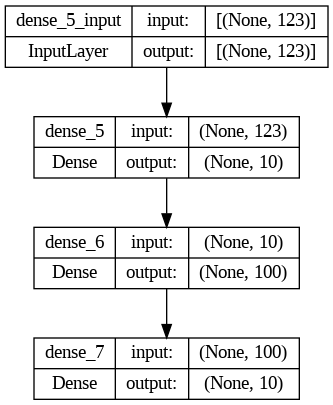

In [127]:
# Plot Model
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [128]:
# Ann Visualizer
!pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [129]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title='Neural Network Viz', view=True, filename='/folder/nn_model.gz')